<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

# Linear Regression

이번 모듈에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다. 이 데이터셋은 미국 시애틀 King County 지역에서 2014년 5월부터 ~ 2015년 5월 까지 주택 판매 가격 데이터입니다.

   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)


이 데이터를 사용해 다음 과제를 마크다운과 코드를 사용해 진행해 주세요.



In [ ]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')


In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### 1) 특성들과 타겟(Price)과의 상관계수를 계산하고 가장 상관관계가 높은 특성을 찾아 타겟과의 관계를 시각화 하세요.
- **타겟과 상관관계가 가장 높은 특성의 이름을 제출하세요.**

In [ ]:
# df.corr()로 타겟과 여러 변수들의 상관계수를 확인합니다. 
df.corr().sort_values(by='price', ascending=False)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
grade,0.008130,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248
sqft_above,-0.010842,0.605567,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,-0.261190,-0.000816,0.343803,0.731870,0.194050
sqft_living15,-0.002901,0.585379,0.391638,0.568634,0.756420,0.144608,0.279885,0.086463,0.280439,-0.092824,0.713202,0.731870,0.200355,0.326229,-0.002673,-0.279033,0.048858,0.334605,1.000000,0.183192
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
sqft_basement,-0.005151,0.323816,0.303093,0.283770,0.435043,0.015286,-0.245705,0.080588,0.276947,0.174105,0.168392,-0.051943,1.000000,-0.133124,0.071323,0.074845,0.110538,-0.144765,0.200355,0.017276
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
lat,-0.001891,0.307003,-0.008931,0.024573,0.052529,-0.085683,0.049614,-0.014274,0.006157,-0.014941,0.114084,-0.000816,0.110538,-0.148122,0.029398,0.267048,1.000000,-0.135512,0.048858,-0.086419


### 2) sqft_living 와 price의 scatter plot을 그리고 기준모델을 시각화해 보세요.
- **기준모델의 값을 제출하세요.(소수점 이하 반올림)**

predict 540088.0


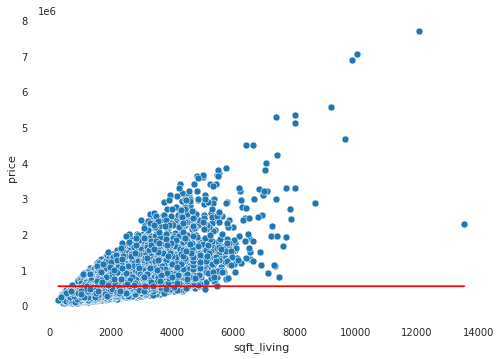

In [91]:
# sqft_living과 price의 scatter plot을 시각화합니다. 
import seaborn as sns 
import numpy as np 

x = df['sqft_living']
y = df['price']

predict = df['price'].mean()

sns.lineplot(x = x, y = predict, color='red')
sns.scatterplot(x=x, y=y)

# 기준모델의 값을 확인합니다. 소수점 이하 반올림.
print("predict", np.around(predict))

### 3) Scikit-Learn 라이브러리를 사용해 특성 sqft_living에 대한 선형회귀모델을 만들어 보세요.
- **sqft_living 값이 15000인 경우에 모델이 예측하는 주택 가격을 과제 제출폼에 제출하세요.(소수점 이하 반올림)**

In [ ]:
# scikit-learn 의 LinearRegression 라이브러리를 불러옵니다. 
from sklearn.linear_model import LinearRegression

# 예측모델 인스턴스를 만듭니다
model = LinearRegression()

In [ ]:
# X특성과 y 타겟 벡터를 만듭니다
feature = ['sqft_living']
target = ['price']
X_train = df[feature]
y_train = df[target]

In [ ]:
# 모델을 학습(fit)합니다
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
# 새로운 데이터 한 샘플을 학습한 모델에 넣어 예측해 봅니다
import numpy as np

X_test = [[15000]]
y_pred = np.around(model.predict(X_test))

print(f'{X_test[0][0]} sqft_living를 가지는 주택의 예상 가격은 ${int(y_pred)} 입니다.')

15000 sqft_living를 가지는 주택의 예상 가격은 $4165773 입니다.


### 4) 만든 모델을 사용해 새로운 데이터에 대해 예측을 해 보고 coefficient를 사용해 설명해 보세요.
- **sqft_living 특성에 대한 회귀계수를 제출하세요.(소수점 이하 반올림)**

In [93]:
# 선형모델의 회귀계수(coefficient)를 구합니다. 
import numpy as np

np.around(model.coef_)

array([[281.]])

### 5) bathrooms 특성을 사용하여 모델을 만들어 보고 두 모델을 비교해 보세요.
- **bathrooms에 대한 회귀계수를 제출하세요. (소수점 이하 반올림)**

In [90]:
# bathrooms 특성을 사용한 모델의 회귀계수를 구합니다. 

from sklearn.linear_model import LinearRegression
import numpy as np

feature = ['bathrooms']
target = ['price']
X_train = df[feature]
y_train = df[target]

model2 = LinearRegression()

model2.fit(X_train, y_train)

# model2.coef_ 

# 반올림
np.around(model2.coef_)



array([[250327.]])